In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import torch

# Append to path the Dataset class file 
DatasetPath = '~/work/CDEs/Dataset/'
# collect the absolute path for this
DatasetPath = os.path.abspath(os.path.expanduser(DatasetPath))
sys.path.append(DatasetPath)

from Dataset2 import DatasetContainer

In [2]:
# To Produce a full dataset, we need the following variables:
#  1. Name of the dataset
#  2. Number of events
#  3. Number of pixels
#  4. Key - Loc dictionary for the Event Level Keys
#  5. Key - Loc dictionary for the Pixel Level Keys

#  6. Event level data
#  7. Pixel level data
#  8. Traces for each pixel

DatasetName = 'CDEsDataset'


In [3]:
# Load in the CSVs 
EventLevelDataPath = "../Data/Proccessed/EventLevelData.csv"
PixelLevelDataPath = "../Data/Proccessed/PixelLevelData.csv"
# Collect the absolute path for these
EventLevelDataPath = os.path.abspath(os.path.expanduser(EventLevelDataPath))
PixelLevelDataPath = os.path.abspath(os.path.expanduser(PixelLevelDataPath))

print(f"Event level data path: {EventLevelDataPath}")
print(f"Pixel level data path: {PixelLevelDataPath}")


# Check these paths exist
if not os.path.exists(EventLevelDataPath):
    raise FileNotFoundError(f"Event level data path does not exist: {EventLevelDataPath}")
if not os.path.exists(PixelLevelDataPath):
    raise FileNotFoundError(f"Pixel level data path does not exist: {PixelLevelDataPath}")

EventLevelData = pd.read_csv(EventLevelDataPath)
PixelLevelData = pd.read_csv(PixelLevelDataPath)

EventLevelData.head()

Event level data path: /home/fedor-tairli/work/CDEs/Data/Proccessed/EventLevelData.csv
Pixel level data path: /home/fedor-tairli/work/CDEs/Data/Proccessed/PixelLevelData.csv


EventID  Rec_Level  Event_Class  Primary  Gen_LogE  \
0   Batch_300001788:Shower_467         10            1     2212   16.2287   
1   Batch_300001788:Shower_493         10            1     2212   16.2287   
2  Batch_300001788:Shower_5271         10            1    26056   16.5267   
3   Batch_300001212:Shower_864         10            1     7014   16.0694   
4  Batch_300001212:Shower_8457         10            4     2212   15.8265   

   Gen_CosZenith  Gen_Xmax  Gen_dEdXmax  Gen_SDPPhi  Gen_SDPTheta  ...  \
0       0.510597   726.948     0.020933   -1.464580      0.795983  ...   
1       0.510351   726.948     0.020933   -0.767134      1.698630  ...   
2       0.865692   563.361     0.047958   -2.953880      1.369870  ...   
3       0.809692   640.834     0.017309    1.831750      1.865070  ...   
4       0.635852   495.157     0.010257    1.675840      2.223730  ...   

   Rec_dEdXmax  Rec_SDPPhi  Rec_SDPTheta  Rec_Chi0   Rec_Rp   Rec_T0  \
0     0.022840   -1.492700      0.784086  2.334640  1387.51  28955.9   
1     0.025147   -0.771776      1.695620  2.602130  1761.13  29972.5   
2     0.050527   -2.983430      1.395070  1.089120  1830.95  28893.2   
3     0.016203    1.873040      1.837190  1.026070  1274.91  28965.0   
4     0.011046    1.724490      2.179800  0.910937  1082.78  29964.3   

   Rec_CoreEyeDist  Rec_CherenkovFraction  Pixel_Start  Pixel_End  
0          1922.63                92.7430            0         62  
1          3428.46                84.2353           62         93  
2          2065.43                66.6721           93        135  
3          1487.24                79.6192          135        162  
4          1380.73                97.1661          162        198  

[5 rows x 28 columns]

In [4]:
NumberOfEvents = len(EventLevelData)
NumberOfPixels = len(PixelLevelData)
print(f"Number of events: {NumberOfEvents}")
print(f"Number of pixels: {NumberOfPixels}")


Number of events: 375911
Number of pixels: 15139496


In [5]:
# # Event Variables
# EventId_1 = int(EventId.split(':')[0].split('_')[1][-6:])
# EventId_2 = int(EventId.split(':')[1].split('_')[1])

# Generate a function that will take the two halfs of the event id and return the event id



# Check if the EventID Column is in the DataFrame
if 'EventID' in EventLevelData.columns:
    # Means this cell has been run before
    # I need to replace the EventID column with the EventId_1 and EventId_2 columns
    EventLevelData['EventId_1/2'] = EventLevelData['EventID'].apply(lambda x: int(x.split(':')[0].split('_')[1][-6:]))
    EventLevelData['EventId_2/2'] = EventLevelData['EventID'].apply(lambda x: int(x.split(':')[1].split('_')[1]))
    # Drop the EventId column
    EventLevelData = EventLevelData.drop(columns=['EventID'])
    # Move the EventId_1 and EventId_2 columns to the front
    EventLevelData = EventLevelData[['EventId_1/2', 'EventId_2/2'] + [col for col in EventLevelData.columns if col not in ['EventId_1/2', 'EventId_2/2']]]

EventLevelData.head()

EventId_1/2  EventId_2/2  Rec_Level  Event_Class  Primary  Gen_LogE  \
0         1788          467         10            1     2212   16.2287   
1         1788          493         10            1     2212   16.2287   
2         1788         5271         10            1    26056   16.5267   
3         1212          864         10            1     7014   16.0694   
4         1212         8457         10            4     2212   15.8265   

   Gen_CosZenith  Gen_Xmax  Gen_dEdXmax  Gen_SDPPhi  ...  Rec_dEdXmax  \
0       0.510597   726.948     0.020933   -1.464580  ...     0.022840   
1       0.510351   726.948     0.020933   -0.767134  ...     0.025147   
2       0.865692   563.361     0.047958   -2.953880  ...     0.050527   
3       0.809692   640.834     0.017309    1.831750  ...     0.016203   
4       0.635852   495.157     0.010257    1.675840  ...     0.011046   

   Rec_SDPPhi  Rec_SDPTheta  Rec_Chi0   Rec_Rp   Rec_T0  Rec_CoreEyeDist  \
0   -1.492700      0.784086  2.334640  1387.51  28955.9          1922.63   
1   -0.771776      1.695620  2.602130  1761.13  29972.5          3428.46   
2   -2.983430      1.395070  1.089120  1830.95  28893.2          2065.43   
3    1.873040      1.837190  1.026070  1274.91  28965.0          1487.24   
4    1.724490      2.179800  0.910937  1082.78  29964.3          1380.73   

   Rec_CherenkovFraction  Pixel_Start  Pixel_End  
0                92.7430            0         62  
1                84.2353           62         93  
2                66.6721           93        135  
3                79.6192          135        162  
4                97.1661          162        198  

[5 rows x 29 columns]

In [6]:
# Check if there is any non float compatible data
for col in EventLevelData.columns:
    if EventLevelData[col].dtype in ['float64','float34','int64','int32']:
        continue
    else:
        raise('Found Column with non float compatible data')    

In [7]:

#  Now we are going to detach the Pixel_Start and Pixel_End from the dataframe. and turn it into a Torch Tensor
if 'Pixel_Start' in EventLevelData.columns:
    EventPixelPositions = EventLevelData[['Pixel_Start', 'Pixel_End']].copy()
    # Drop the Pixel_Start and Pixel_End columns from the EventLevelData DataFrame
    EventLevelData = EventLevelData.drop(columns=['Pixel_Start', 'Pixel_End'])
    # Convert the EventPixelPositions DataFrame to a numpy array
    EventPixelPositions_tensor = torch.tensor(EventPixelPositions.to_numpy(),dtype=torch.float32)
    
print(f"EventPixelPositions shape: {EventPixelPositions_tensor.shape}")

EventPixelPositions shape: torch.Size([375911, 2])


In [8]:
# Produce Event Level Keys
EventLevelKeys = {}
for col in EventLevelData.columns:
    EventLevelKeys[col] = EventLevelData.columns.get_loc(col)
print(f"Event Level Keys: {EventLevelKeys}")
print(f'total number of event level keys: {len(EventLevelKeys)}')

Event Level Keys: {'EventId_1/2': 0, 'EventId_2/2': 1, 'Rec_Level': 2, 'Event_Class': 3, 'Primary': 4, 'Gen_LogE': 5, 'Gen_CosZenith': 6, 'Gen_Xmax': 7, 'Gen_dEdXmax': 8, 'Gen_SDPPhi': 9, 'Gen_SDPTheta': 10, 'Gen_Chi0': 11, 'Gen_Rp': 12, 'Gen_T0': 13, 'Gen_CoreEyeDist': 14, 'Gen_CherenkovFraction': 15, 'Rec_LogE': 16, 'Rec_CosZenith': 17, 'Rec_Xmax': 18, 'Rec_dEdXmax': 19, 'Rec_SDPPhi': 20, 'Rec_SDPTheta': 21, 'Rec_Chi0': 22, 'Rec_Rp': 23, 'Rec_T0': 24, 'Rec_CoreEyeDist': 25, 'Rec_CherenkovFraction': 26}
total number of event level keys: 27


In [9]:
#  Cast the Entire EventLevelData to a torch tensor
EventLevelData_tensor = torch.tensor(EventLevelData.to_numpy(),dtype=torch.float32)


In [10]:
print(f"EventLevelData shape: {EventLevelData.shape}")

EventLevelData shape: (375911, 27)


In [11]:
# Now we deal with the Pixel Level Data
PixelLevelData.head()

PixelID  TelID  EyeID  Status   Charge    Theta      Phi  TimeOffset  \
0      221      1      5       0  203.810  32.5095  43.5606           0   
1      199      1      5       0  403.014  32.5095  45.3394           0   
2      200      1      5       0    0.000  33.8117  44.4500           0   
3      223      1      5       0   25.290  35.1073  43.5332           0   
4      201      1      5       0  128.053  35.1073  45.3668           0   

   PulseStart  PulseCentroid  PulseStop  \
0         580            0.0        593   
1         580            0.0        593   
2         579            0.0        593   
3         579            0.0        593   
4         579            0.0        593   

                                           TraceBins  
0  -13.6491 38.1711 5.7835 -3.93278 18.7385 51.12...  
1  -4.08737 4.81401 -10.0216 -4.08737 25.5839 153...  
2  -36.4994 -7.19522 -14.5213 -10.8582 -7.19522 7...  
3  -13.6711 -13.6711 -1.84092 12.9468 1.11662 -25...  
4  1.35412 18.6633 10.0087 1.35412 -21.7248 -15.9...

In [12]:
#  First we have to split the PixelLevelData into PixelLevelData and PixelTraces.
#  Pixel Traces are stored in the PixelLevelData in column TraceBins and are space seperated values for each bin
#  Lets first detach that into a separate DataFrame and deal with it later, becuase they are not all the same length
if 'TraceBins' in PixelLevelData.columns:
    PixelTraces = PixelLevelData[['TraceBins']].copy()
    # Drop the TraceBins column from the PixelLevelData DataFrame
    PixelLevelData = PixelLevelData.drop(columns=['TraceBins'])

In [13]:
#  Now we make the pixel level keys
PixelLevelKeys = {}
for col in PixelLevelData.columns:
    PixelLevelKeys[col] = PixelLevelData.columns.get_loc(col)
print(f"Pixel Level Keys: {PixelLevelKeys}")
print(f'total number of pixel level keys: {len(PixelLevelKeys)}')

#  Now we need to convert the PixelLevelData to a torch tensor
PixelLevelData_tensor = torch.tensor(PixelLevelData.to_numpy(),dtype=torch.float32)
print(f"PixelLevelData shape: {PixelLevelData.shape}")

Pixel Level Keys: {'PixelID': 0, 'TelID': 1, 'EyeID': 2, 'Status': 3, 'Charge': 4, 'Theta': 5, 'Phi': 6, 'TimeOffset': 7, 'PulseStart': 8, 'PulseCentroid': 9, 'PulseStop': 10}
total number of pixel level keys: 11
PixelLevelData shape: (15139496, 11)


In [66]:
# Work with the Pixel Traces - 
# Need to take only the first 40 TraceBins out of a trace and drop the rest
# for Traces shorter than 40 will need to pad with zeros at the end
#  Easiest way seems to be to preallocate a massive 2d tensor and then fill it in

MaxTraceLength = 40
Traces_Tensor = torch.zeros((len(PixelTraces), MaxTraceLength), dtype=torch.float32)

for i, trace in enumerate(PixelTraces['TraceBins']):
    if type(trace) != str:
        # If the trace is not a string, it is empty
        continue # Can just skip cause the trensor is preallocated to zeros
    # Split the trace into a list of floats
    trace = torch.tensor(np.array(trace.split(' ')).astype(np.float32), dtype=torch.float32)
    TraceLength = min(MaxTraceLength,len(trace))

    Traces_Tensor[i, :TraceLength] = trace[:TraceLength]


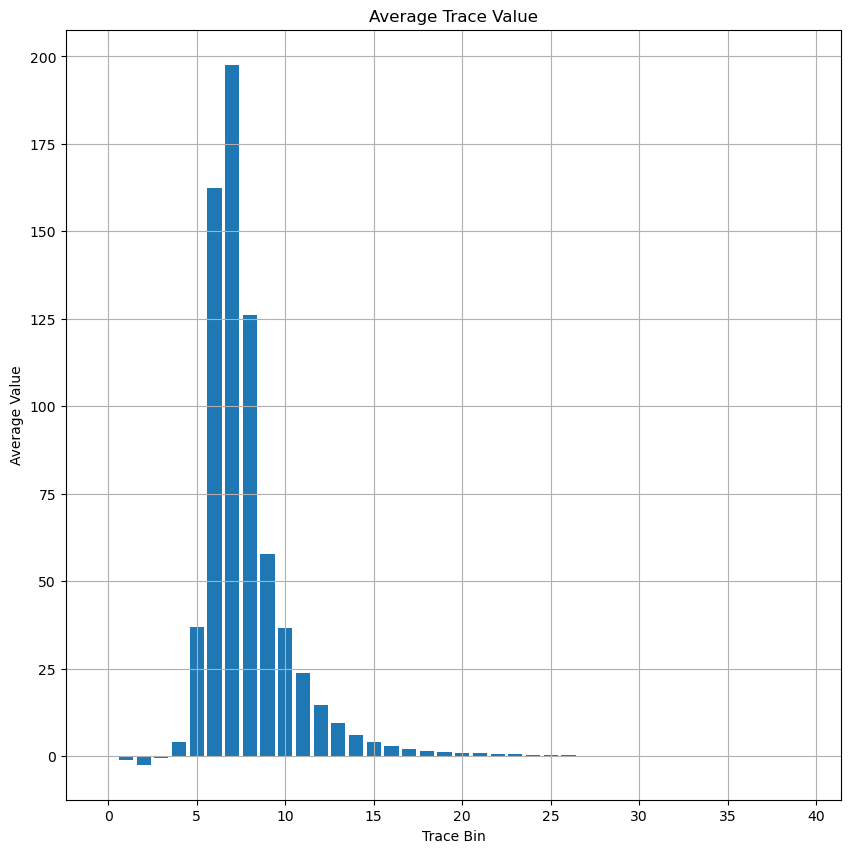

In [77]:
plt.figure(figsize =[10,10])
plt.bar(range(40),Traces_Tensor.sum(dim =0)/len(Traces_Tensor))
plt.xlabel('Trace Bin')
plt.ylabel('Average Value')
plt.title('Average Trace Value')
plt.grid()


### Tesing Traces Lengths and things

In [19]:
All_Trace_Lengths = [] 
NBadTraces = 0
NGoodTraces = 0

for i in range(len(PixelTraces)):
    Trace = PixelTraces.iloc[i]['TraceBins']
    # if i > 100000: break
    # print(f'Number of Good Traces: {NGoodTraces}, Number of Bad Traces: {NBadTraces}',end='\r')
    try:
        All_Trace_Lengths.append(len(Trace.split(' ')))
        NGoodTraces += 1
    except:
        All_Trace_Lengths.append(-1)
        NBadTraces += 1
print(f'Number of Good Traces: {NGoodTraces}, Number of Bad Traces: {NBadTraces}')


Number of Good Traces: 15139214, Number of Bad Traces: 282


Text(0.5, 1.0, 'Trace Length Distribution')

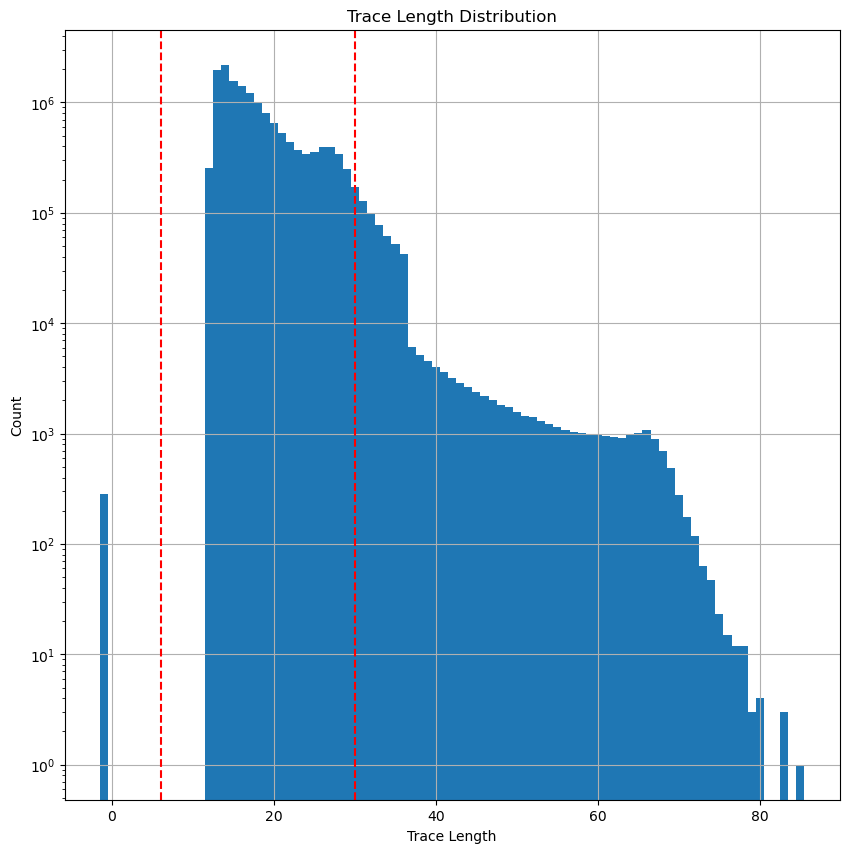

In [30]:
All_Trace_Lengths = np.array(All_Trace_Lengths)
Unique_Trace_Lengths, Unique_Trace_Lengths_Counts = np.unique(All_Trace_Lengths, return_counts=True)

plt.figure(figsize=(10, 10))
plt.bar(Unique_Trace_Lengths, Unique_Trace_Lengths_Counts, width=1)
plt.yscale('log')
plt.grid()

plt.axvline(6 , color='red', linestyle='--')
plt.axvline(30, color='red', linestyle='--')

plt.xlabel('Trace Length')
plt.ylabel('Count')
plt.title('Trace Length Distribution')


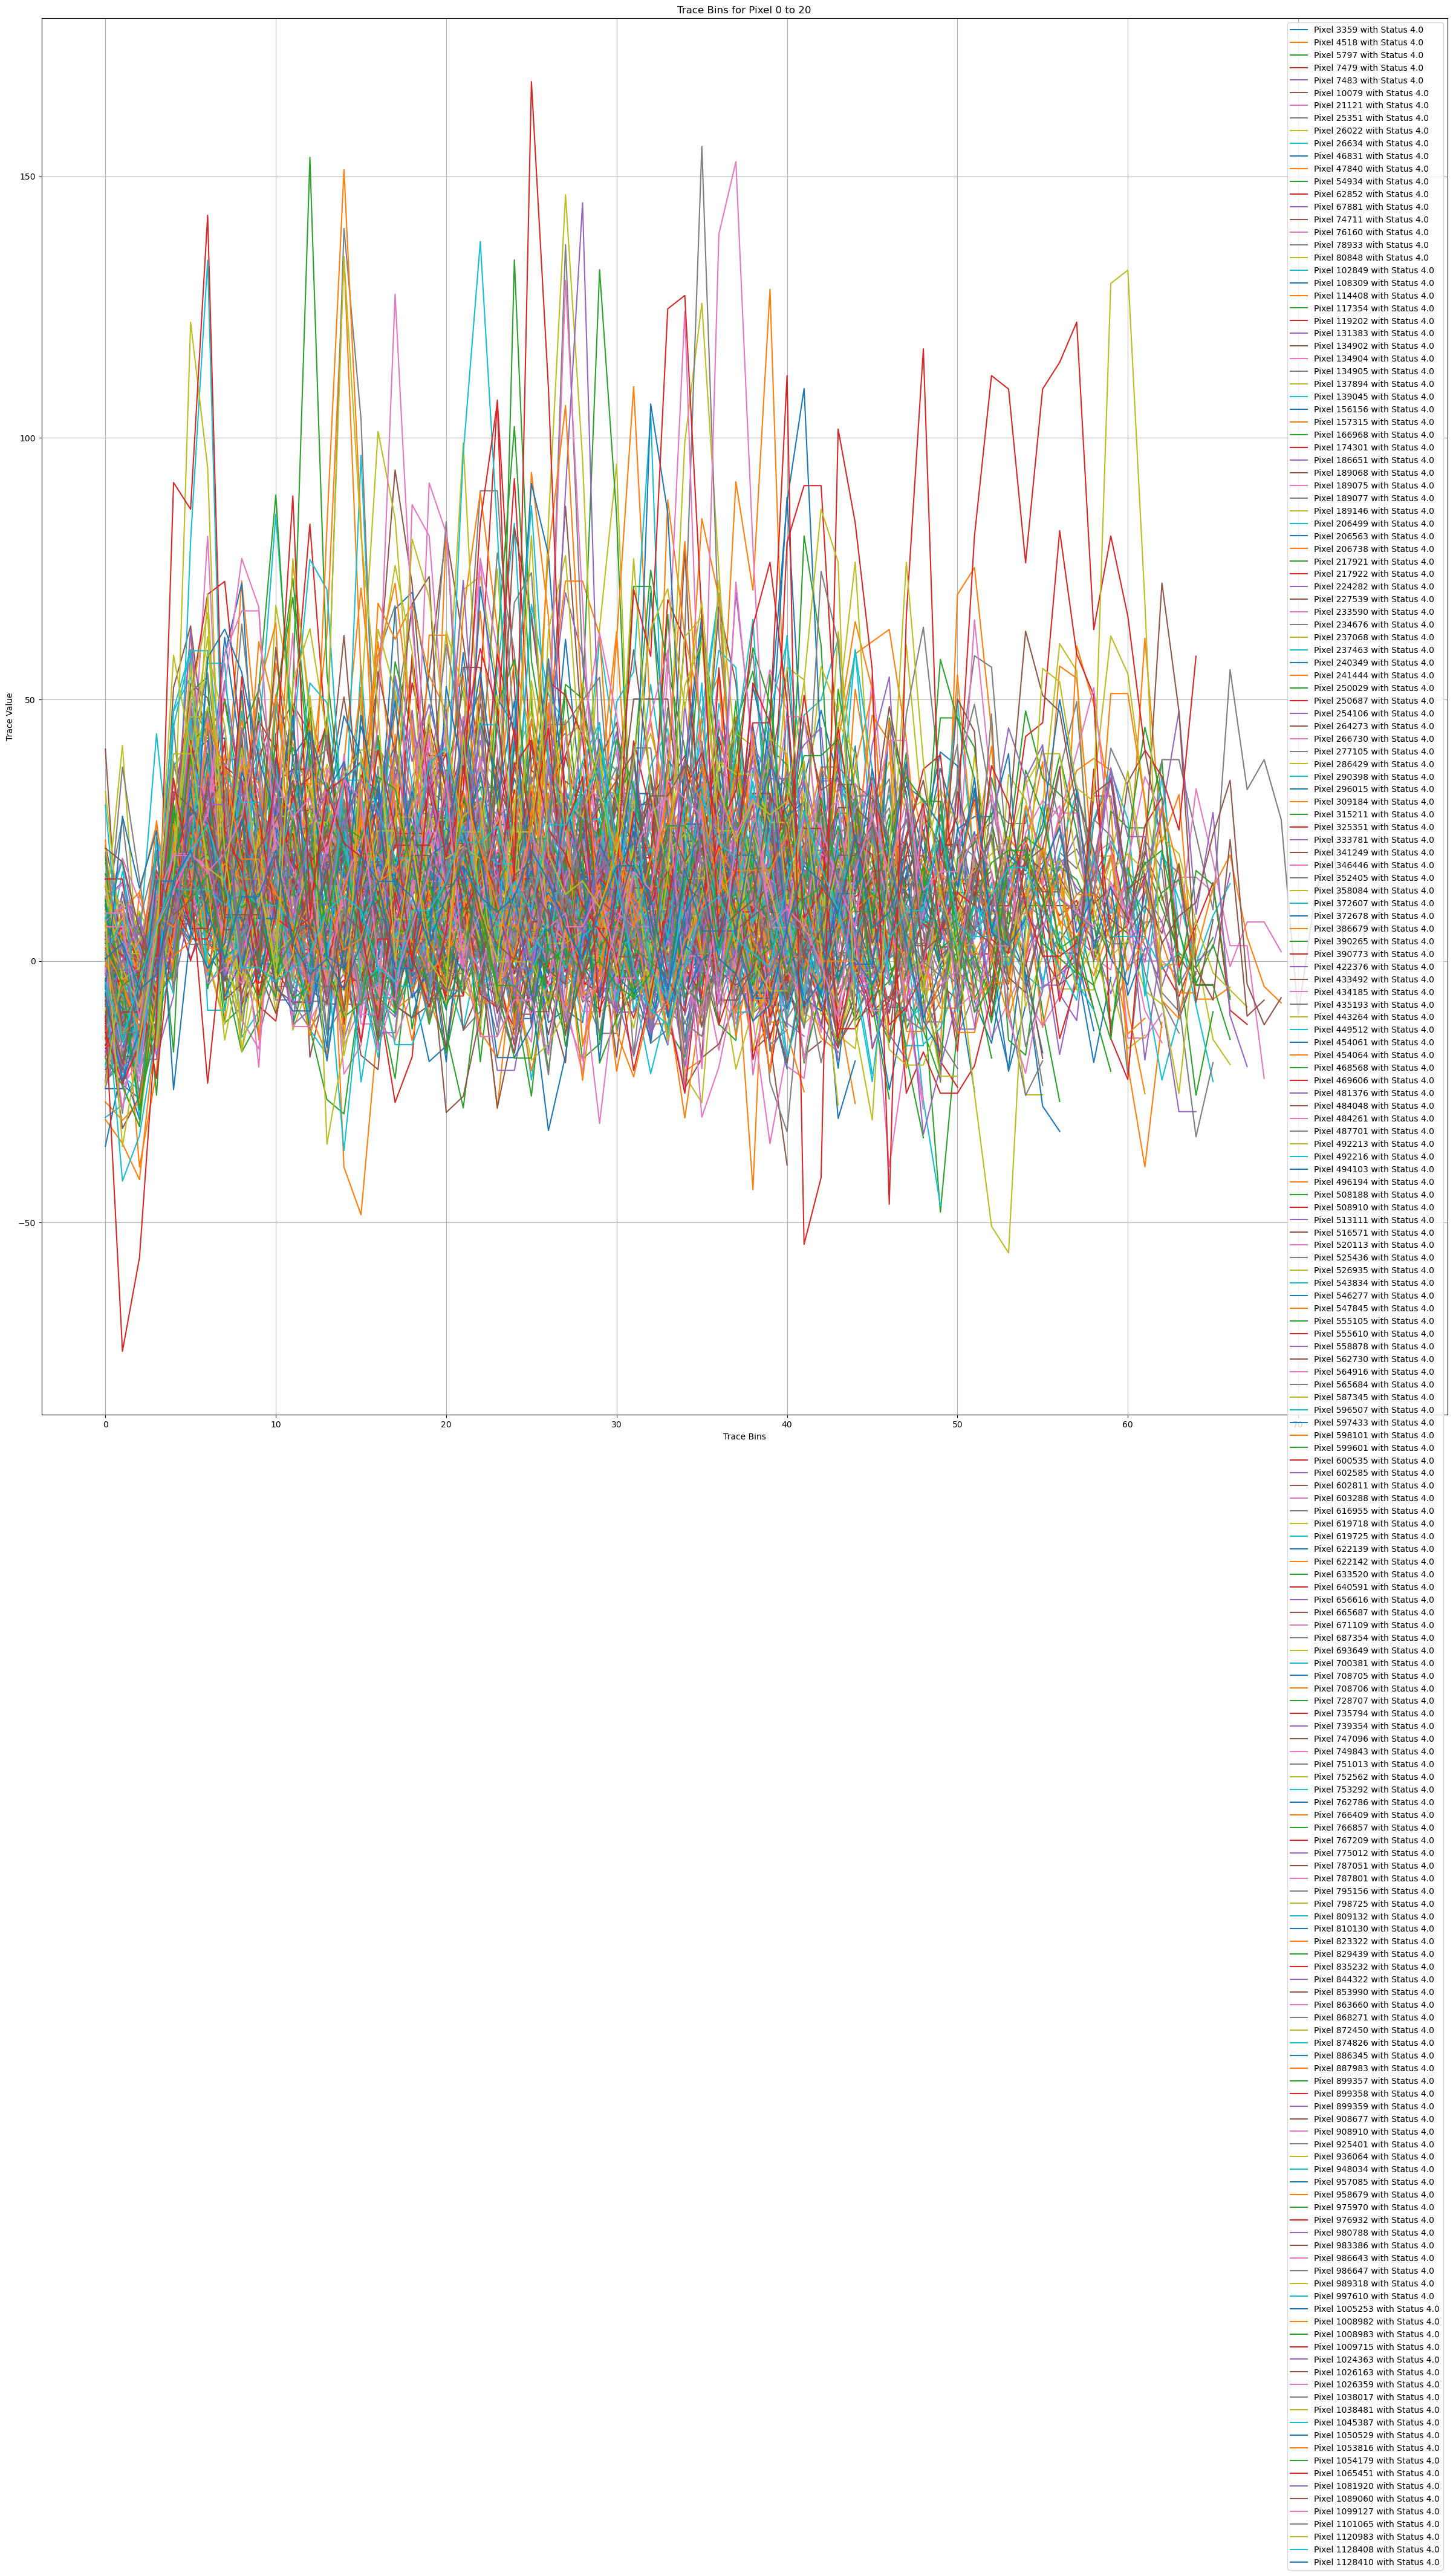

In [63]:
plt.figure(figsize=(30, 30))
NPlotCount = 0
for i in range(len(PixelTraces)):
    Trace = PixelTraces.iloc[i]['TraceBins']
    if type(Trace) == float: continue
    if len(Trace.split(' ')) > 40:
        Trace = Trace.split(' ')
        Trace = np.array(Trace).astype(np.float32)
        if PixelLevelData.iloc[i]['Status'] == 4:
            plt.plot(Trace, label=f'Pixel {i} with Status {PixelLevelData.iloc[i]["Status"]}')
            NPlotCount += 1
    if NPlotCount > 200: break

plt.legend()
plt.xlabel('Trace Bins')
plt.ylabel('Trace Value')
plt.title('Trace Bins for Pixel 0 to 20')
plt.grid()



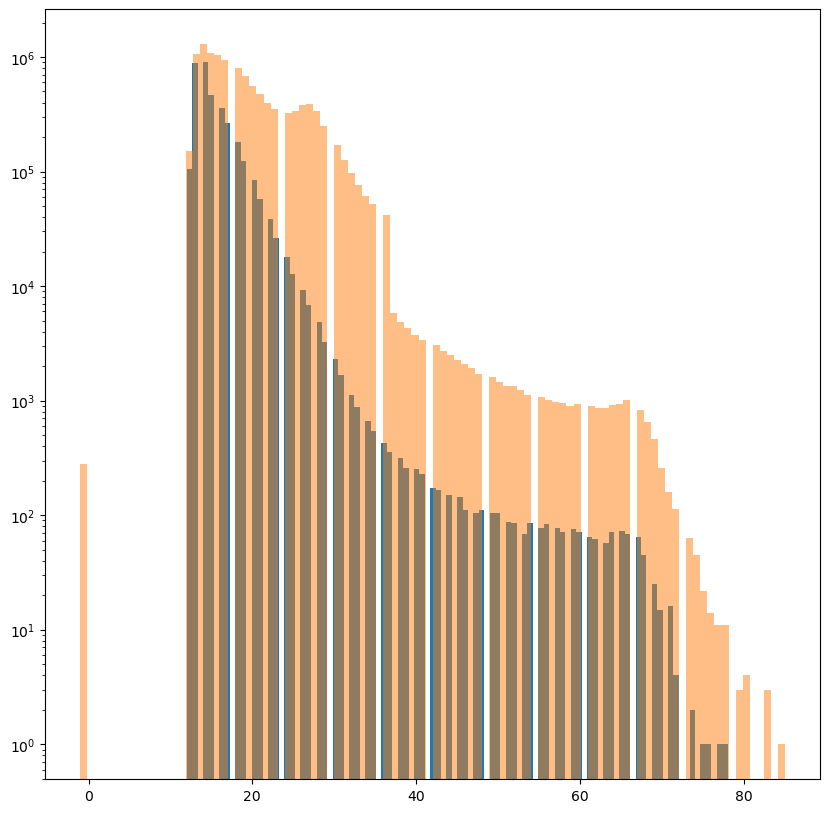

In [52]:
All_Statuses = PixelLevelData.Status
plt.figure(figsize=(10, 10))
plt.hist(All_Trace_Lengths[All_Statuses == 4], bins=100)
plt.hist(All_Trace_Lengths[All_Statuses < 4 ], bins=100,alpha = 0.5)
plt.yscale('log')